<h1 style = "text-align: center"> STATISTICS PROJECT-2 </h1>

### GROUP MEMBERS
1) V Hemanth Reddy (AI23BTECH11033)
2) Sattar Saif (MA23BTECH11023)
3) Anurag (MA23BTECH11004)


## INTRODUCTION
This assignment focuses on applying fundamental statistical inference techniques to real-world data related to the COVID-19 pandemic. Using a variety of data types, we aim to estimate parameters, construct confidence intervals, and conduct hypothesis testing under different distributional assumptions.

# About this Data
The dataset for this project has been sourced from [World Health Organization (WHO) COVID-19 Dashboard](https://data.who.int/dashboards/covid19/data) which includes weekly reported cases and deaths, along with their cumulative totals and also another dataset from [kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset) which includes Mexican COVID-19 patients' age, pre-existing health conditions,gender etc. Since raw data often contains missing values, we have preprocessed the dataset to enhance its accuracy and usability for statistical analysis.

Our preprocessing steps included handling missing values, correcting inconsistencies, and structuring the data for better visualization. Specifically:

- We manually added WHO region names where they were missing.
- For missing weekly reported cases and deaths, we cross-verified online and confirmed that they represent 0 reported cases and deaths for that week.
- For estimation of MLE and MOM, we removed rows containing '0' in the column `Cases- cumulative total per 100000 population` in dataset `Cumulative_WHO_data.csv`.
- In the "Latest Reported Counts of COVID-19 Cases and Deaths" dataset, we removed the following columns:
    - `Cases - newly reported in last 7 days`
    - `Cases - newly reported in last 7 days per 100,000 population`
    - `Cases - newly reported in last 24 hours`
    - `Deaths - newly reported in last 7 days`
    - `Deaths - newly reported in last 7 days per 100,000 population`
    - `Deaths - newly reported in last 24 hours`
      
These columns were excluded because we are primarily working with data covering the entire duration of the pandemic, while these columns represent cases or deaths reported in the last 7 days or 24 hours on a specific date in the year 2025, which falls well beyond the pandemic period.

By applying these preprocessing steps, we have ensured that the dataset is clean, structured, and suitable for statistical analysis, allowing for meaningful insights into the trends and impact of COVID-19 cases and deaths worldwide. And the data set after preprocessing are presented below in the form of hyperlinks:
- [Cumulative WHO data](https://drive.google.com/file/d/1-QejvNkXy0n1W2urLPa5SrIiF0Hhstjg/view?usp=drive_link)
- [Weekly reported WHO data](https://drive.google.com/file/d/1AhPskD4t_PapF5BNK3z_HSS3AS4qNVM_/view?usp=drive_link)
- [COVID-19 dataset](https://drive.google.com/file/d/16hxMjBIkHe47wZQ6vs8KkZAloMnONp1v/view?usp=drive_link)


## Code
Note that to run this code you need have the
following libraries installed-
- numpy
- matplotlib
- pandas
- scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm,gamma,chi2,t
from scipy.special import digamma
from IPython.display import display, HTML

## 1. ESTIMATING PARAMETERS FOR GAMMA FUNCTION

In [ ]:
h_df = pd.read_csv('Cumulative_WHO_data.csv')
h_per100_cases=h_df["Cases - cumulative total per 100000 population"]
h_data=np.array(h_per100_cases)

Let us now consider a dataset consisting of real-valued, positive observations $x_1, x_2, \cdots, x_n$, assumed to be independently and identically distributed from a Gamma distribution, denoted as $\text{Gamma}(a, b)$, where $a$ is the shape parameter and $b$ is the scale parameter. The probability density function of the Gamma distribution is given by:

$$
f(x; a, b) = \frac{1}{\Gamma(a)b^a } x^{a-1} e^{-\frac{x}{b}}, \quad x > 0,\; a, b > 0
$$

Let us now derive estimates for the parameters $a$ and $b$ using two approaches: the **method of moments (MoM)** and the **maximum likelihood estimation (MLE)**.

The dataset used for this question is Cummulative_WHO_data.csv's Cases - cumulative total per 100000 population column



### Method of Moments (MoM)

Let $\mu$ and $\sigma^2$ denote the population mean and variance of the Gamma distribution, respectively. It is known that:

$$
\mu = ab, \quad \sigma^2 = a b^2
$$

From the data, compute the mean and variance as:

$$
\text{mean} = \frac{1}{n} \sum_{i=1}^n x_i, \quad \text{variance} = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{X})^2
$$

1. From the mean, we get $$ab = \text{mean} \tag{1}$$

2. From the variance, we get
   $$ ab^2 = \text{var} \tag{2} $$

From equation (1), we solve for $b$ as:  
$$ b = \frac{\text{mean}}{a} $$

Substituting this into equation (2), we get:  
$$
\begin{align*}
a \left( \frac{\text{mean}}{a} \right)^2 &= \text{var} \\
 \frac{\text{mean}^2}{a} &= \text{var} \\
 a &= \frac{\text{mean}^2}{\text{var}}
\end{align*}
$$

Now substitute this back to find $b$:  
$$
b = \frac{\text{mean}}{a} = \frac{\text{mean}}{\frac{\text{mean}^2}{\text{var}}} = \frac{\text{var}}{\text{mean}}
$$

**Final MoM Estimates**

- Shape $(a)$: $\quad a = \frac{\text{mean}^2}{\text{var}}$

- Scale $(b)$:  $\quad b = \frac{\text{var}}{\text{mean}}$



These values provide a first estimate of the parameters using Method 1.

Alternatively, we can directly fit the Gamma distribution using statistical libraries (e.g., `scipy.stats.gamma.fit`), constrained with `floc=0` to enforce the support of the Gamma distribution on $(0, \infty)$, and selecting the method of estimation as `'MM'` (Method of Moments). This gives the estimates for parameters $a$ and $b$ using Method 2, which we can use to cross verify for Method 1.

In [ ]:

h_x_mean=np.mean(h_data)
h_x_var=np.var(h_data)
h_a_mom1=h_x_mean**2/h_x_var
h_b_mom1=h_x_var/h_x_mean
print(f"Gamma distribution parameters (Methods of Moments from method 1):a={h_a_mom1},b={h_b_mom1}")

h_a_mom2,h_loc1,h_b_mom2=gamma.fit(h_data,floc=0,method='MM')
print(f"Gamma distribution parameters (Methods of Moments from method 2):a={h_a_mom2},b={h_b_mom2}")


Gamma distribution parameters (Methods of Moments from method 1):a=1.0097872904991596,b=20503.579970838367
Gamma distribution parameters (Methods of Moments from method 2):a=1.0097872904991596,b=20503.579970838367


### Maximum Likelihood Estimation (MLE)

For the Gamma distribution, the likelihood function is given by:

$$
L(a, b) = \prod_{i=1}^n \frac{1}{\Gamma(a) b^a} x_i^{a-1} e^{-x_i/b}
$$

Taking the natural logarithm, we obtain the log-likelihood:

$$
\log L(a, b) = n \left[- a \log b - \log\Gamma(a) \right] + (a-1) \sum_{i=1}^n \log x_i - \frac{1}{b} \sum_{i=1}^n x_i
$$

To obtain the MLE, we differentiate with respect to $a$ and $b$ and solve the system of equations.
we know the digamma function $\psi(a) = \frac{d}{da} \log\Gamma(a)$ .

differentiating log-likelihood with b, we get:

$$
\begin{align*}
- \frac{n a}{b}+\frac{\sum_{i=1}^n x_i}{b^2}&=0 \\
\frac{\sum_{i=1}^n x_i}{b^2 }&= \frac{n a}{b} \\
\frac{\sum_{i=1}^n x_i}{n}&= a b \tag{1}
\end{align*}
$$

differentiating log-likelihood with a,we get:

$$
\begin{align*}
-n \log b - n \psi(a) &+ \sum_{i=1}^n \log x_i =0 \\
\sum_{i=1}^n \log x_i &= n \log b + n \psi(a) \\
\log \left( \prod_{i=1}^n x_i \right)^{1/n} &= \log b +  \psi(a) \tag{2} \\
\end{align*}
$$



we know,
$$
\text{AM} = \frac{1}{n} \sum_{i=1}^n x_i, \quad \text{GM} = \left( \prod_{i=1}^n x_i \right)^{1/n}
$$

let,

$$
c= \frac{\text{GM}}{\text{AM}}
$$

from (1),

$$
b=\frac{AM}{a}
$$

substituting in (2),
$$
\begin{align*}
\log GM &= \log \left( \frac{AM}{a}\right) +  \psi(a)\\
\log \frac{GM}{AM} + \log a &=  \psi(a)\\
\log c + \log a &=  \psi(a)\\
\log (c a) &=  \psi(a)\\
\log (c a) &=  \psi(a)\\
\psi(a)-\log (c a) &=0
\end{align*}
$$



Thus we need to solve $\psi(a)-\log (c a) =0$. This equation has been plotted over a range of $x$ values using the function $y = \psi(x) - \log(xc)$, and the root of this function corresponds to the MLE estimate for $a$, denoted $a_{\text{MLE}}$. Once $a$ is known, the scale parameter can be estimated as:
$$
b_{\text{MLE}} = \frac{\text{AM}}{a_{\text{MLE}}}
$$

These values constitute the MLE using Method 1.

Alternatively, by using the `gamma.fit()` function with `method='MLE'`, we obtain the estimates directly from numerical optimization routines as Method 2, which we can use to cross verify the Method 1.


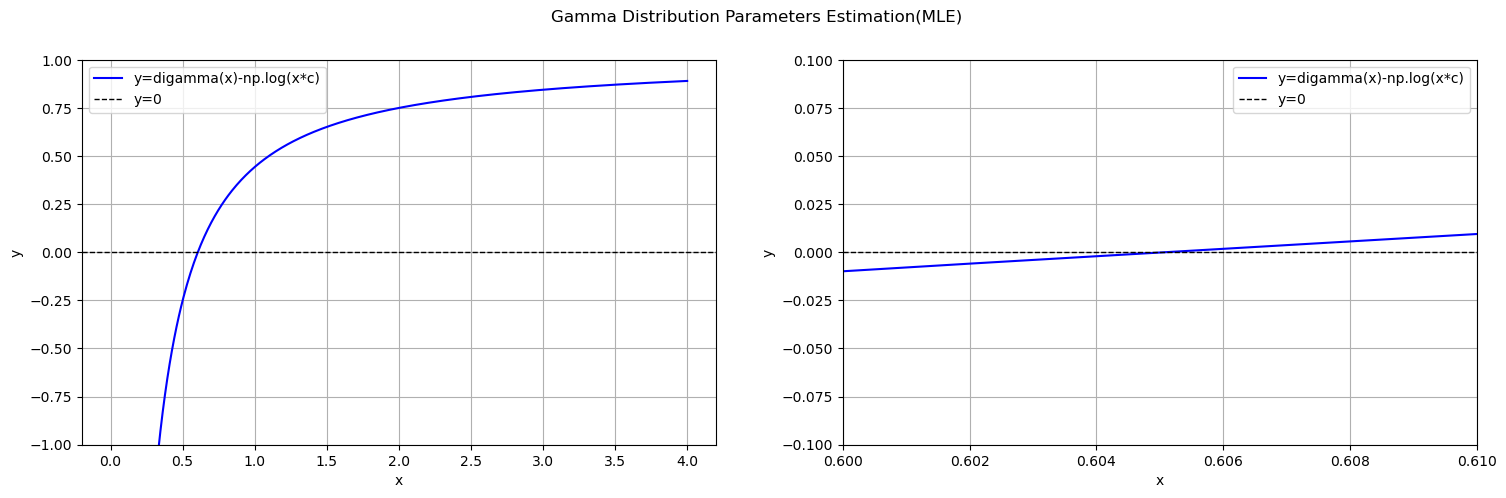

Gamma distribution parameters(Maximum Likelihood Estimation from method 1:a=0.605,b=34221.90820543093
Gamma distribution parameters(Maximum Likelihood Estimation from method 2:a=0.605051254043016,b=34219.00925903006


In [ ]:
h_n=len(h_data)
h_gm_x=[x**(1/h_n) for x in h_data]
h_gm=np.prod(h_gm_x)
h_am=h_x_mean
c=h_gm/h_am
x=np.linspace(0.001,4,500)
y=digamma(x)-np.log(x*c)
fig,(full,zoomed) = plt.subplots(1,2,figsize=(18, 5))
plt.suptitle('Gamma Distribution Parameters Estimation(MLE)')
full.plot(x, y, label='y=digamma(x)-np.log(x*c)', color='blue')
full.axhline(0, color='black', lw=1, ls='--',label='y=0')
full.set_xlabel('x')
full.set_ylabel('y')
full.set_ylim((-1,1))
full.legend()
full.grid()

zoomed.plot(x, y, label='y=digamma(x)-np.log(x*c)', color='blue')
zoomed.axhline(0, color='black', lw=1, ls='--',label='y=0')
zoomed.set_xlim((0.6,0.61))
zoomed.set_ylim((-0.1,0.1))
zoomed.set_xlabel('x')
zoomed.set_ylabel('y')
zoomed.legend()
zoomed.grid()
plt.show()

h_a_mle1=0.605
h_b_mle1=h_x_mean/h_a_mle1
print(f"Gamma distribution parameters(Maximum Likelihood Estimation from method 1:a={h_a_mle1},b={h_b_mle1}")

h_a_mle2,h_loc2,h_b_mle2=gamma.fit(h_data,floc=0,method='MLE')
# h_b_mle2=1/h_b_mle2_inv
print(f"Gamma distribution parameters(Maximum Likelihood Estimation from method 2:a={h_a_mle2},b={h_b_mle2}")


## 2. CONFIDENCE INTERVAL FOR VARIANCE

In this section, we are going to construct the $95\%$ confidence interval for the variance parameter of a normal distribution using the Cumulative Covid-19 dataset.

Let $X_1, X_2, \cdots, X_n$ be a random sample drawn from a normal distribution with unknown mean $\mu$ and unknown variance $\sigma^2$. We denote the sample variance by $S^2$, which is defined as  
$$
S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})^2,
$$  
where $\overline{X} = \sum_{i=1}^n X_i/n$ is the sample mean. Since the population is normal, and we know that the   
$$
\frac{(n-1)S^2}{\sigma^2} \sim \chi^2_{n-1}
$$  
follows a chi-squared distribution with $n - 1$ degrees of freedom.

Now, to obtain the confidence interval for the variance $\sigma^2$, we make use of the cumulative distribution function of the chi-square distribution. Let $\alpha = 0.05$ be the significance level. Then,

- $\chi^2_{\alpha/2,\;n-1}$ is the value such that the area to the left of it under the $\chi^2$ curve is $\alpha/2$.
- $\chi^2_{1 - \alpha/2,\;n-1}$ is the value such that the area to the left of it is $1 - \alpha/2$.

By the definition of a confidence interval, we can write  
$$
\begin{align*}
P\left(\chi^2_{\alpha/2,\;n-1} \leq \frac{(n-1)S^2}{\sigma^2} \leq \chi^2_{1-\alpha/2,\;n-1} \right) &= P\left(\frac{(n-1)S^2}{\sigma^2} \leq \chi^2_{1-\alpha/2,\;n-1} \right) - P\left(\frac{(n-1)S^2}{\sigma^2} \leq\chi^2_{\alpha/2,\;n-1}\right) \\
&= (1 - \alpha/2)-\alpha/2 \\
&= 1-\alpha
\end{align*}
$$
hence,
$$
P\left(\chi^2_{\alpha/2,\;n-1} \leq \frac{(n-1)S^2}{\sigma^2} \leq \chi^2_{1-\alpha/2,\;n-1} \right) = 1 - \alpha.
$$  
Rearranging the inequality, we obtain
$$
P\left( \frac{(n-1)S^2}{\chi^2_{1 - \alpha/2,\;n-1}}\leq \sigma^2 \leq\frac{(n-1)S^2}{\chi^2_{\alpha/2,\;n-1}} \right)= 1 - \alpha.
$$

the $100(1 - \alpha)\%$ confidence interval for $\sigma^2$ is  
$$
\left( \frac{(n-1)S^2}{\chi^2_{1 - \alpha/2,\;n-1}}, \frac{(n-1)S^2}{\chi^2_{\alpha/2,\;n-1}} \right).
$$

Now, using the given dataset, we compute the confidence interval as follows:


In [ ]:
h_svar=np.var(h_data,ddof=1)
h_alpha=0.05
h_dof=h_n-1
h_chi2_1=chi2.ppf(h_alpha/2,h_dof)
h_chi2_2=chi2.ppf(1-h_alpha/2,h_dof)
h_lhs=h_dof*h_svar/h_chi2_2
h_rhs=h_dof*h_svar/h_chi2_1

print(f"Confidence interval for variance:({h_lhs},{h_rhs})")

Confidence interval for variance:(357144234.6317109,518109488.1462375)


## 3. CONFIDENCE INTERVAL FOR DIFFERENCES IN MEANS

In [ ]:
s_df = pd.read_csv("Weekly_covid_data.csv")
s_df.drop(['Country_code', 'Country', 'Cumulative_cases', 'Cumulative_deaths'], axis=1, inplace=True)
s_df = s_df.sample(frac=1)

In [ ]:
s_regions = ['AFRO', 'AMRO', 'EMRO', 'EURO', 'SEARO', 'WPRO']
s_data = {}
s_count ={}

for s_region in s_regions:
    s_df1 = s_df[s_df['WHO_region'] == s_region]
    s_df2 = s_df1.drop(['WHO_region'], axis=1)
    s_df3 = s_df2.groupby('Date_reported')[['New_cases', 'New_deaths']].sum().reset_index()
    s_data[s_region] =  s_df3.values.tolist()
    s_count[s_region] = len(s_data[s_region])

# count = {x[0]: x[1] for x in df.groupby('WHO_region')[['New_cases', 'New_deaths']].count().reset_index().values.tolist()}
s_df4 = s_df.drop(['Date_reported'],axis=1)
s_df5 = s_df4.groupby('WHO_region')[['New_cases', 'New_deaths']].sum().reset_index()
s_regional_avg = {x[0]: [x[1]/(s_count[x[0]]), x[2]/(s_count[x[0]])] for x in s_df5.values.tolist()}

s_regional_var = {}
for s_region in s_regions:
    s_case_sum2=0
    s_death_sum2 =0
    for x in s_data[s_region]:
        s_case_sum2 += (x[1]-s_regional_avg[s_region][0])**2
        s_death_sum2 += (x[2]-s_regional_avg[s_region][1])**2
    s_n = len(s_data[s_region])
    s_regional_var[s_region] = [s_case_sum2/(s_n-1), s_death_sum2/(s_n-1)]
# print( df5)

In this section we are going to estimate the differnece between average number of cases/deaths per week across differnet regions, to do that let us first divise the 95% confidence interval of difference of means of two samples, sampled from two independent normal distributions.

Let $X_1, X_2, \cdots , X_n$ be a sample of size $n$ from a normal population having mean $\mu_1$ (which is unknown) and let $Y_1, \cdots , Y_m$ be a sample of size $m$ from a different normal population having mean $\mu_2$ (which is unknown). Now, let us assume that both distributions have same variance $\sigma^2$. Now let $\overline X = \sum_{i=1}^n X_i/n$ and $\overline Y = \sum_{i=1}^m Y_i/m$. Now as
$$
\begin{align*}
\overline X&\sim\mathcal{N}(\mu_1,\sigma^2/n) \\
\overline Y&\sim\mathcal{N}(\mu_2,\sigma^2/m)
\end{align*}
$$
and as sum of independent normal random variables is also normal, we have
$$
\begin{align*}
\overline X - \overline Y &\sim\mathcal{N}(\mu_1-\mu_2,\sigma^2/n + \sigma^2/m)
\Rightarrow \frac{\overline X - \overline Y-(\mu_1-\mu_2)}{\sigma\sqrt{\frac{1}{n}+ \frac{1}{m}}} &\sim\mathcal{N}(0,1).
\end{align*}
$$
Let $S_1^2$ and $S_2^2$ be the sample variance of $X_i$'s and $Y_i$'s, we know that
$$
\begin{align*}
(n-1)\frac{S_1^2}{\sigma^2}&\sim\chi_{n-1}^2
(m-1)\frac{S_2^2}{\sigma^2}&\sim\chi_{m-1}^2.
\end{align*}
$$
As the samples are independent and as sum of independent chi-square random variables is also chi-square with a degree of freedom equal to the sum of their degrees of freedom
$$(n-1)\frac{S_1^2}{\sigma^2}+(m-1)\frac{S_2^2}{\sigma^2} \sim \chi_{n+m-2}^2.$$ Now, let define $S_p$ as follows
$$S_p^2 = \frac{(n-1)S_1^2+(m-1)S_2^2}{n+m-2}$$
and as the ratio of an independent standard normal random variable and the square root of a chi-square random variable divided by its degree of freedom parameter is a $t$-random variable with degrees of freedom being that of chi-squared, so we have
$$\frac{\overline X -\overline Y-(\mu_1-\mu_2)}{\sqrt{S_p^2(1/n+1/m)}} \sim t_{n+m-2}.$$
Now, let us define $t_{\alpha/2}$ and $t_{1-\alpha/2}$ as $P(x > t_{\alpha/2}) = \alpha$  and $P(x> t_{1-\alpha/2})= 1-\alpha/2$ in $t_{n+m-2}$ distribution. So
$$
\begin{align*}
P(t_{1-\alpha/2} \leq x \leq t_{\alpha/2}) &= P(x \leq t_{\alpha/2}) - P(x \leq t_{1-\alpha/2}) \\
&= (1-P(x>t_{\alpha/2})) - (1-P(x \leq t_{1-\alpha/2}))\\
&= P(x \leq t_{1-\alpha/2}) - P(x>t_{\alpha/2})\\
&= 1-\alpha/2 - \alpha/2 = 1- \alpha
\end{align*}
$$
Hence, $$P\bigg(t_{1-\alpha/2}\leq\frac{\overline X -\overline Y -(\mu_1-\mu_2)}{S_p\sqrt{1/n+1/m}} \leq t_{\alpha/2}\bigg) = 1-\alpha.$$
Therefore $100(1-\alpha)\%$ confidence interval for $\mu_1-\mu_2$ is $$\bigg(\overline X- \overline Y + t_{1-\alpha/2}S_p\sqrt{\frac{1}{n}+\frac{1}{m}}\;,\; \overline X- \overline Y + t_{\alpha/2}S_p\sqrt{\frac{1}{n}+\frac{1}{m}}\bigg)$$

In [ ]:

s_t1 = t.ppf(0.975, df = 2*s_n-2) # Note that here P(x <= s_t1) = 0.975 => P(x > s_t1) = 0.025 = alpha/2
s_t2 = t.ppf(0.025, df = 2*s_n-2) # Similarly, P(x <= s_t2) = 0.025 => P(x > s_t2) = 0.975 = 1-alpha/2

# Therefore P(s_t2 <= x <=  s_t2) = 0.95

s_results=[]
for s_life in [0,1]:
    for i in range(len(s_regions)):
        for j in range(len(s_regions)):
            if i < j :
                s_region1 = s_regions[i]
                s_region2 = s_regions[j]
                s_sp = ((s_regional_var[s_region1][s_life] + s_regional_var[s_region2][s_life])/2)**(0.5)

                # Estimate for region1 - region2
                s_L = s_regional_avg[s_region1][s_life] - s_regional_avg[s_region2][s_life] + s_t2*s_sp*((2/s_n)**(0.5))
                s_R = s_regional_avg[s_region1][s_life] - s_regional_avg[s_region2][s_life] + s_t1*s_sp*((2/s_n)**(0.5))

                s_results.append({
                    "Life/Death": "Cases" if s_life == 0 else "Deaths",
                    "Region 1": s_region1,
                    "Region 2": s_region2,
                    "95% CI Lower": round(s_L, 3),
                    "95% CI Upper": round(s_R, 3)
                })
s_rdf = pd.DataFrame(s_results)

In [ ]:
s_cases_html = s_rdf[s_rdf["Life/Death"] == "Cases"].drop(["Life/Death"], axis=1).to_html(index=False)
s_deaths_html = s_rdf[s_rdf["Life/Death"] == "Deaths"].drop(["Life/Death"], axis=1).to_html(index=False)

s_combined_html = f"""
<div style="display: flex; gap: 40px;">
  <div>
    <h3>Estimations of Difference in Average Cases</h3>
    {s_cases_html}
  </div>
  <div>
    <h3>Estimations of Difference in Average Deaths</h3>
    {s_deaths_html}
  </div>
</div>
"""

display(HTML(s_combined_html))

Region 1,Region 2,95% CI Lower,95% CI Upper
AFRO,AMRO,-815434.251,-550688.292
AFRO,EMRO,-68660.926,-34166.502
AFRO,EURO,-1229137.062,-790597.057
AFRO,SEARO,-247418.742,-137276.292
AFRO,WPRO,-1128488.454,-351237.673
AMRO,EMRO,498496.356,764798.759
AMRO,EURO,-582757.170,-70854.406
AMRO,SEARO,347659.164,633768.345
AMRO,WPRO,-467242.373,353638.789
EMRO,EURO,-1178194.036,-738712.656


### Line Plots of Weekly Cases/Deaths
The following plots below illustrates the weekly progression of COVID-19 cases and deaths across the six WHO regions (AFRO, AMRO, EMRO, EURO, SEARO, and WPRO) over time. These week to week progress reveal that each region experienced quite a lot fluctuations in both cases and deaths, because of these big changes from week to week, the data has a lot of variation, which contributes to the high variance observed within each region's data. As a result, the computed 95% confidence intervals for the difference in regional means are relatively wide, indicating greater uncertainty in estimating the average differences between regions.

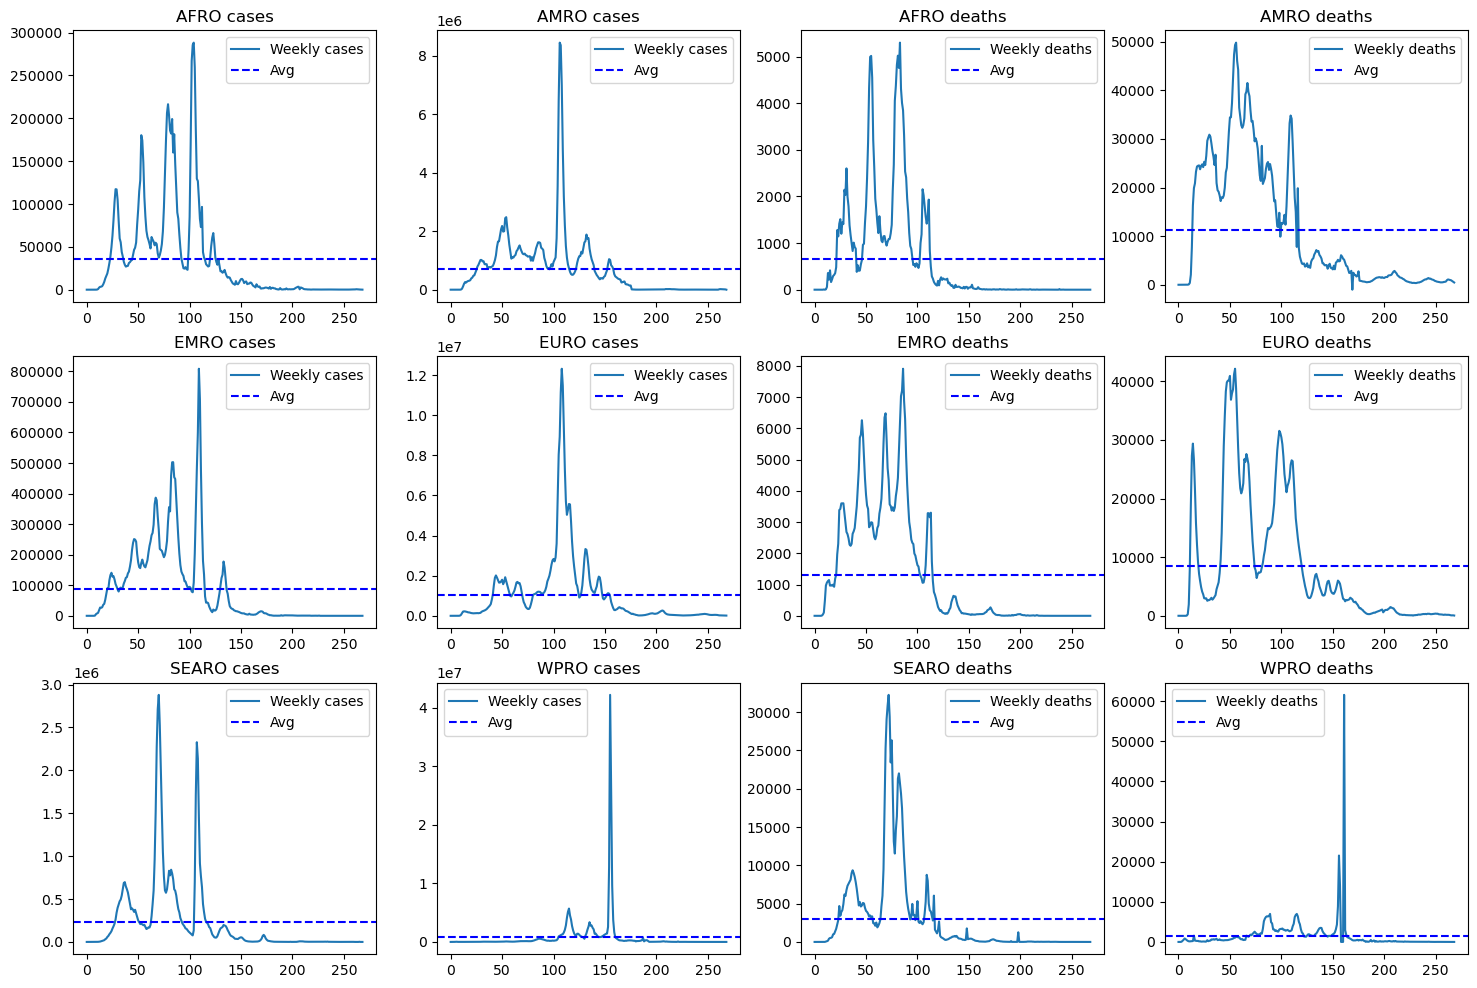

In [ ]:
s_fig, s_axes = plt.subplots(3,4,figsize=(18, 12))

for i in range(3):
    for j in range(2):
        s_region = s_regions[i*2+j]
        s_axes[i,j].plot([x[1] for x in s_data[s_region]], label = "Weekly cases")
        s_c = s_regional_avg[s_region][0]
        s_axes[i,j].axhline(y=s_c, color='blue', linestyle='--', label = "Avg")
        s_axes[i,j].set_title(s_region+' cases')
        s_axes[i,j].legend()

for i in range(3):
    for j in range(2):
        s_region = s_regions[i*2+j]
        s_axes[i,j+2].plot([x[2] for x in s_data[s_region]], label = "Weekly deaths")
        s_c = s_regional_avg[s_region][1]
        s_axes[i,j+2].axhline(y=s_c, color='blue', linestyle='--', label = "Avg")
        s_axes[i,j+2].set_title(s_region+' deaths')
        s_axes[i,j+2].legend()

plt.show()

## 4. HYPOTHESSIS TESTING USING BERNOULI DISTRIBUTION

In [ ]:
a_df=pd.read_csv("Covid Data.csv")
a_df_tobacco=a_df[a_df["TOBACCO"]==1]

We have collected data of COVID-19 patients from mexico. We want to observe the mortality rate of patients who have consumed tobacco.
Let:
- $p$ be the probability that a COVID-19 patient who consumed tobacco died.
- we can assume that the patients' survival are independent of each other. Thus the number of deaths in a sample of size $n$ patients will have a binomial distribution with parameters $(n,p)$.

### Hypotheses

We will consider a test of $H_{0}:p<=\frac{1}{2}$ vs $H_{1}:p>\frac{1}{2}$. The hypothesis is tested with a level of significance of $0.05$. If $H_{0}$ is rejected then there is more than 50% chance that a tobacco consuming person would not have survived if infected with COVID-19.

### Normal Approximation
Let $X$ be the distribution and $d$ total number of deaths in the sample of size $n$. We know that for a sufficiently large $n$, $X$ follows normal distributiion with $\mu=np$ and $\sigma=\sqrt{np(1-p)}$. $\frac{X-np}{\sqrt{np(1-p)}}\sim Z$.

$$
\begin{align*}
p\text{-value}&=P_{0.5}\{X\geq d-0.5\}\\
&=P_{0.5}\{\frac{X-np}{\sqrt{np(1-p)}}\geq\frac{d-0.5-np}{\sqrt{np(1-p)}}\}\\
&\approx P\{Z\geq \frac{d-0.5-np}{\sqrt{np(1-p)}}\}.
\end{align*}
$$

If $p$-value $< 0.05$, we report that $H_{0}$ is rejected otherwise, we fail to reject it.


In [ ]:
a_total=500
a_dead=0
a_df_sample=a_df_tobacco.sample(a_total)
for index, row in a_df_sample.iterrows():
    if row["DATE_DIED"]!="9999-99-99":
        a_dead+=1
print(f"n = {a_total}")
print(f"d = {a_dead}")

n = 500
d = 36


In [ ]:
a_p=0.5
a_mu=a_p*a_total
a_alpha=0.05
a_sigma=np.sqrt(a_total*a_p*(1-a_p))
print(f"np is {a_mu}")
print(f"sqrt(np(1-p)) is {a_sigma}")

np is 250.0
sqrt(np(1-p)) is 11.180339887498949


In [ ]:
a_z_val=(a_dead-0.5-a_mu)/a_sigma
print(f"Z-score is {a_z_val}")
a_p_val=1-norm.cdf(a_z_val)
print(f"p-score is {a_p_val}")
if a_p_val < a_alpha:
    print("Reject H0: Evidence that p > 0.5")
else:
    print("Fail to reject H0: Not enough evidence that p > 0.5")

Z-score is -19.185463246948196
p-score is 1.0
Fail to reject H0: Not enough evidence that p > 0.5
